In [2]:
import pandas as pd
from ifanalysis import counts
import pathlib
%matplotlib inline

In [3]:
df = pd.read_csv('data/Test_Data_long.csv', index_col=0)
df.head()

,experiment,plate_id,well,well_id,image_id,cell_line,condition,label,area_nucleus,intensity_max_DAPI_nucleus,...,intensity_mean_H3P_cyto,intensity_max_EdU_nucleus,intensity_min_EdU_nucleus,intensity_mean_EdU_nucleus,intensity_max_EdU_cell,intensity_min_EdU_cell,intensity_mean_EdU_cell,intensity_max_EdU_cyto,intensity_min_EdU_cyto,intensity_mean_EdU_cyto
0,221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs,1054,F6,11387,398738,MM231,QRICH1,12.0,101.0,14523.019034,...,1086.589917,1032.334411,769.336826,866.800248,1044.835287,669.829192,824.209843,1044.835287,669.829192,808.277877
1,221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs,1054,F6,11387,398738,MM231,QRICH1,15.0,119.0,12363.672912,...,1077.864981,995.591050,735.285905,882.540825,1037.493998,657.570426,825.867738,1037.493998,657.570426,812.243299
2,221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs,1054,F6,11387,398738,MM231,QRICH1,16.0,170.0,12192.006346,...,1157.666332,3529.978946,983.959241,1983.353690,3529.978946,638.174497,1075.124042,1770.647739,638.174497,892.403284
3,221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs,1054,F6,11387,398738,MM231,QRICH1,17.0,132.0,11092.027009,...,1141.427508,19824.725842,3564.984513,13000.528427,19824.725842,719.357567,3230.719579,12413.029411,719.357567,1203.023403
4,221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs,1054,F6,11387,398738,MM231,QRICH1,18.0,169.0,16676.131396,...,1090.493176,1111.353171,780.282233,920.604810,1111.353171,635.226988,828.524797,1052.587722,635.226988,807.664847


In [6]:
conditions = ['SCR', 'QRICH1', 'ZMAT2', 'CDK4', 'INHBE']


Saving figure Cell Counts"


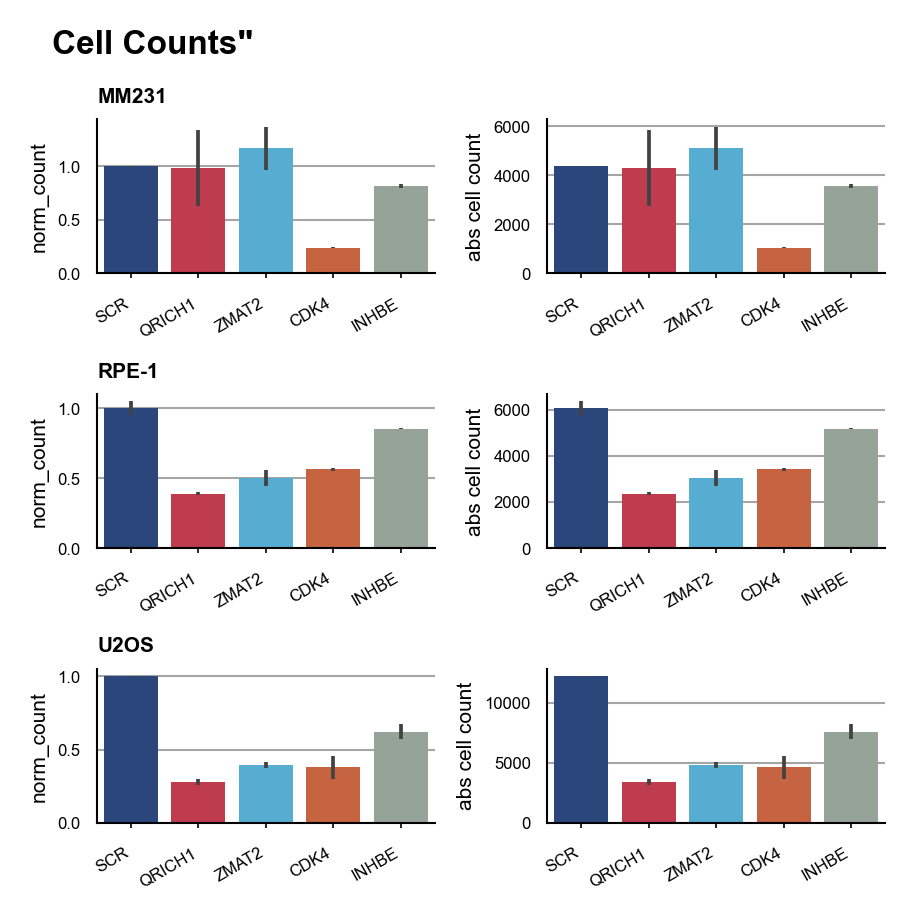

In [10]:
counts.count_cells(df, conditions, 'SCR', path=pathlib.Path('/Users/hh65/Desktop'))

Saving figure CombPlot_test_MM231
Saving figure CombPlot_test_U2OS
Saving figure CombPlot_test_RPE-1
Saving figure barplot_test


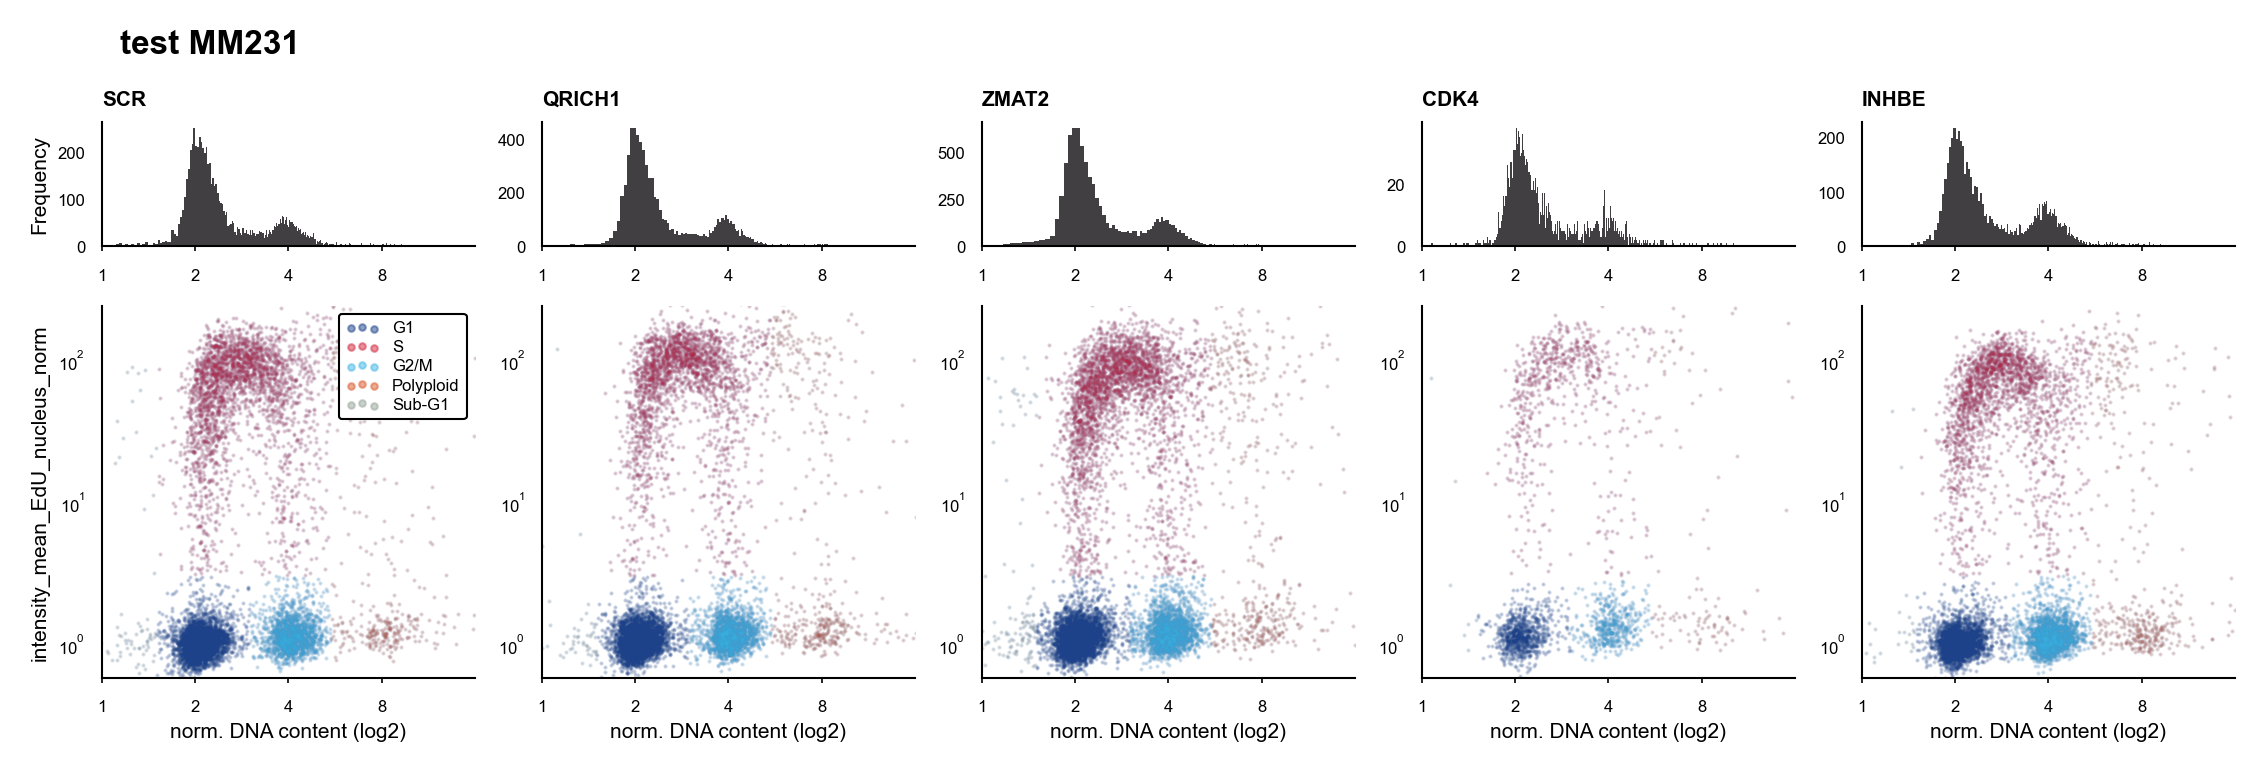

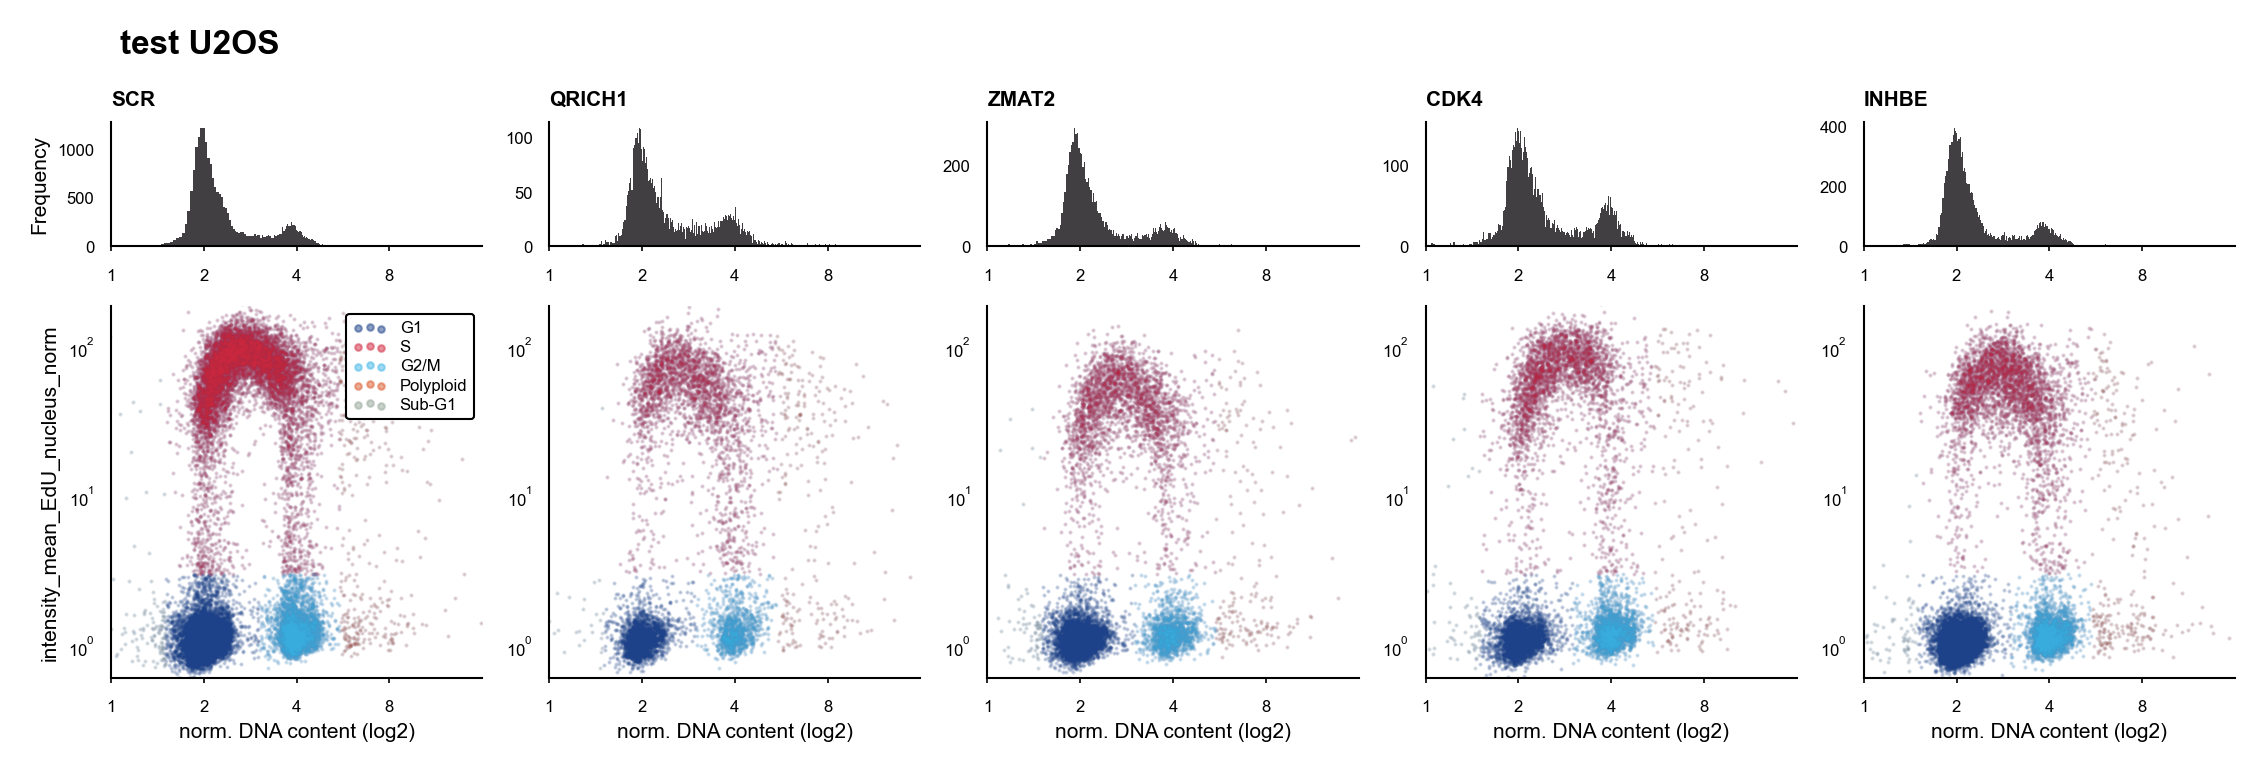

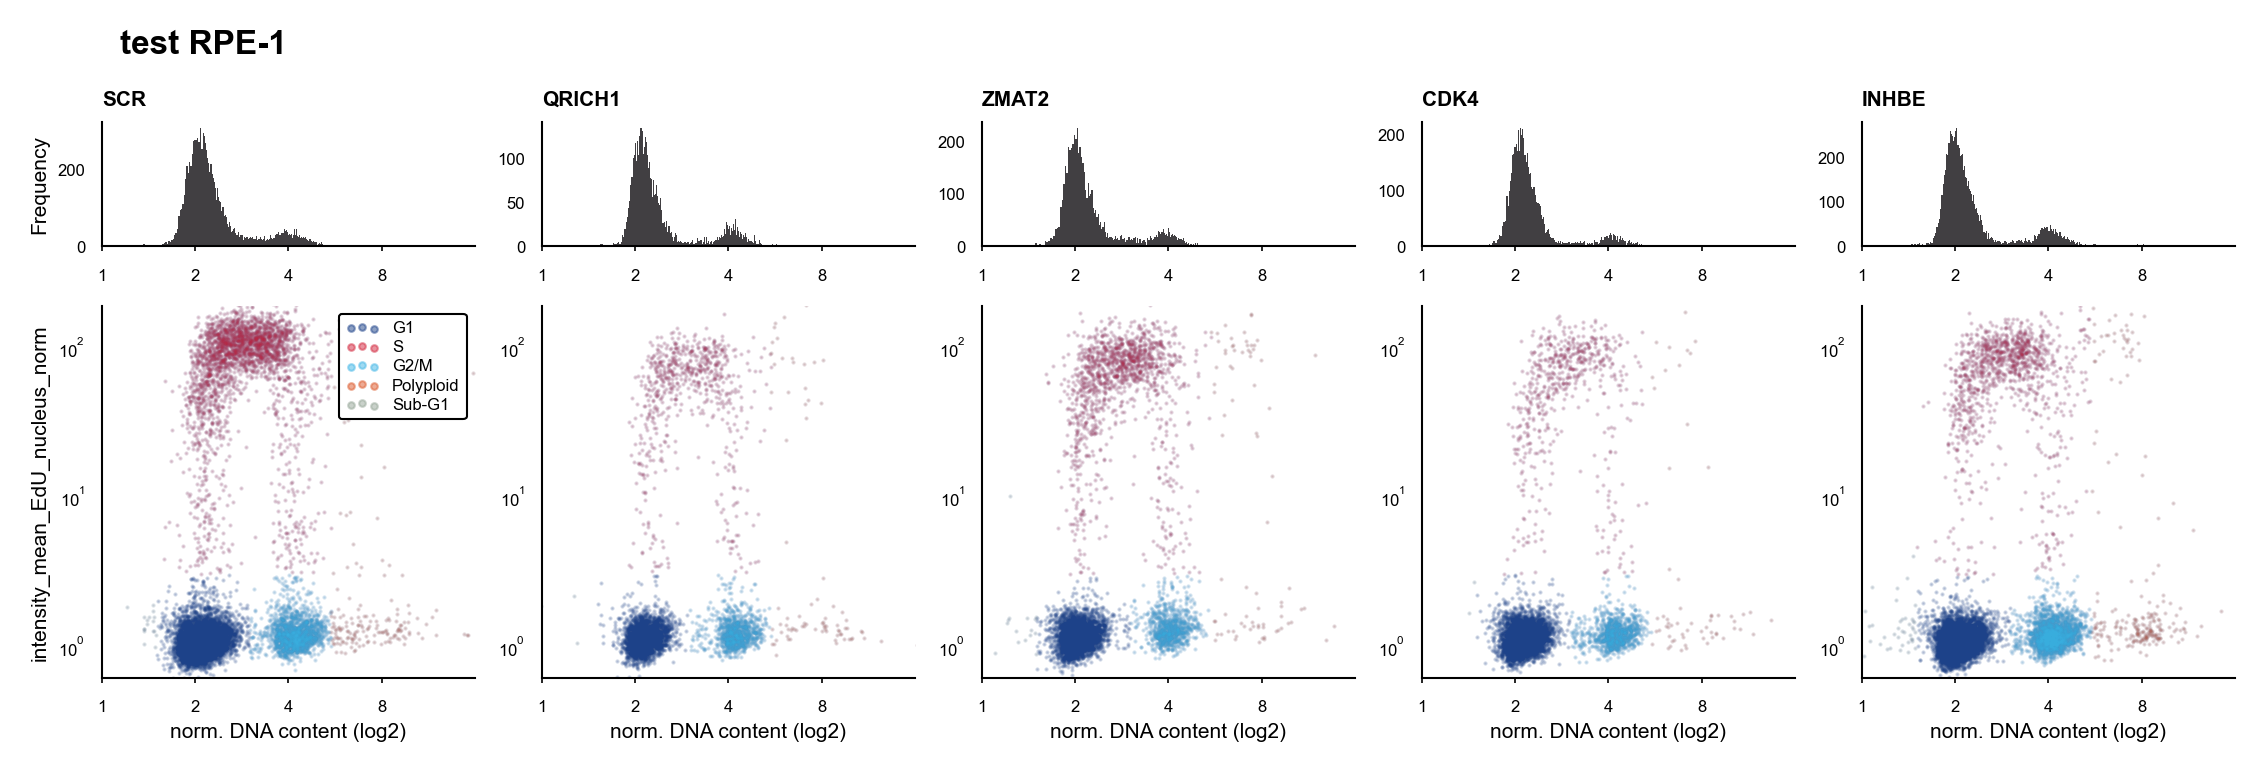

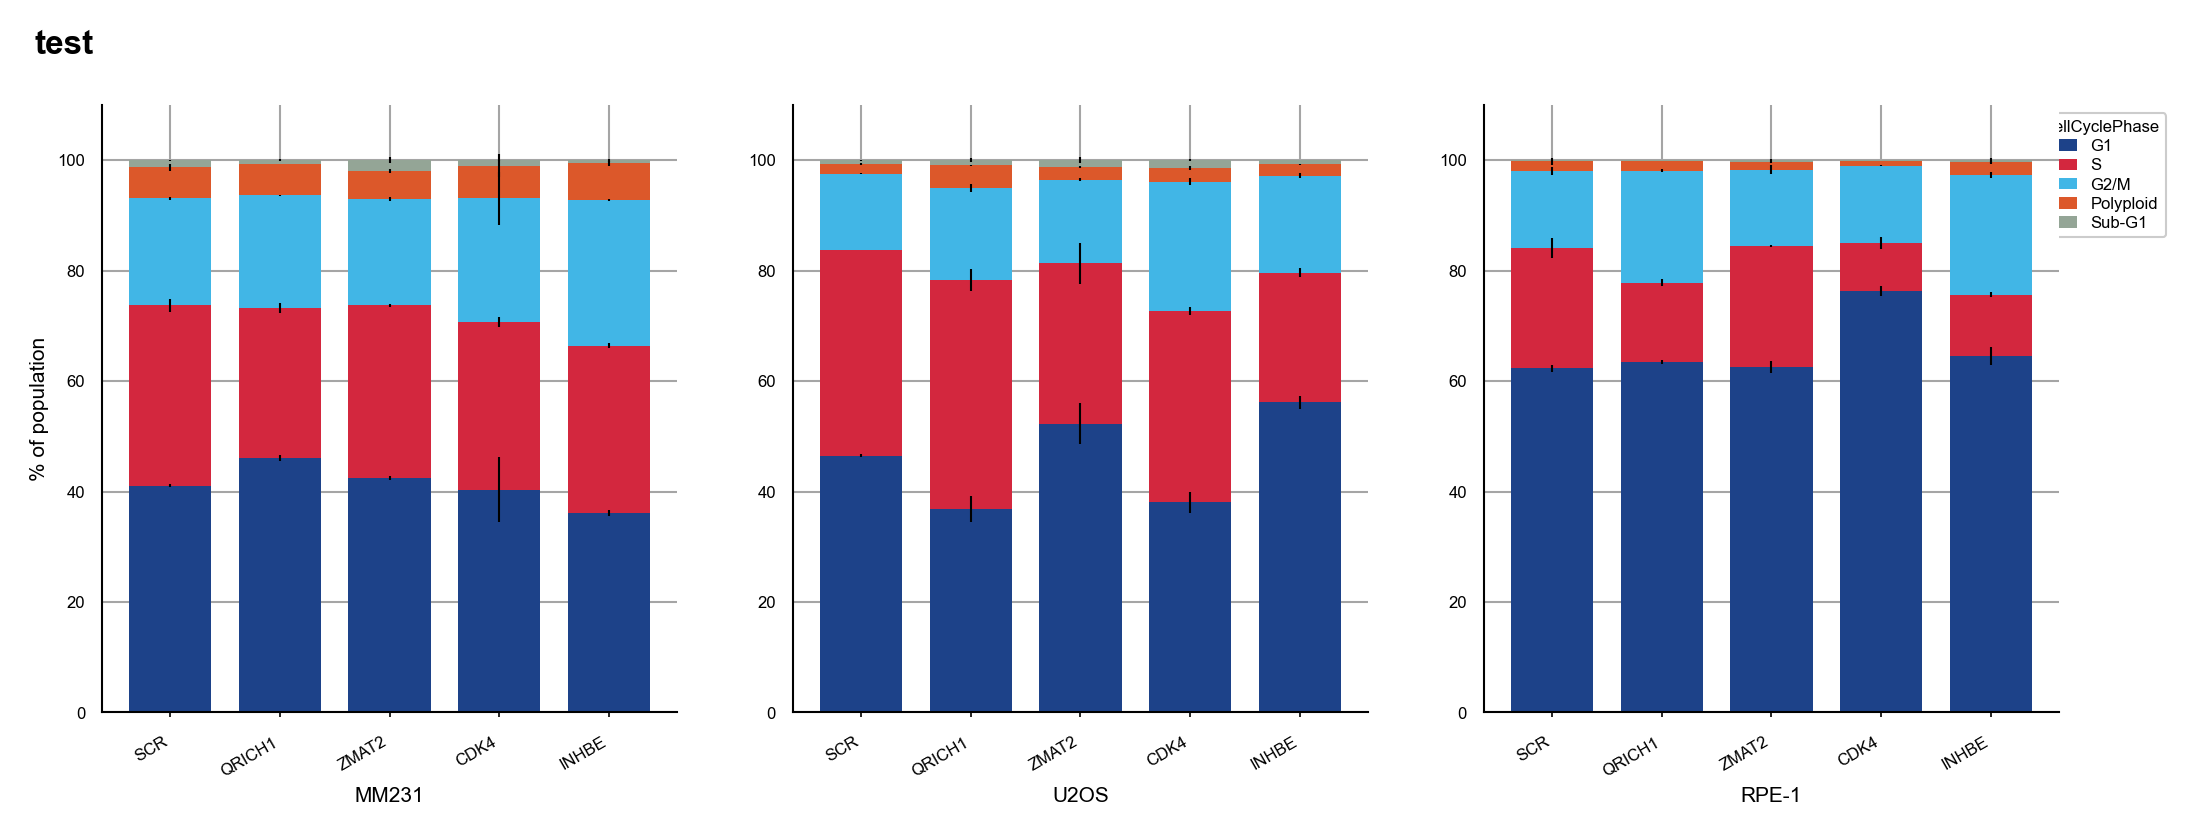

In [12]:
from ifanalysis.cellcycle import standard_cellcycleplots
standard_cellcycleplots(df, conditions, 'test', file_path=pathlib.Path('/Users/hh65/Desktop'))

In [4]:
from ifanalysis import normalisation
df_cc = normalisation.cellcycle_analysis(df)


ValueError: 'c' argument has 135096 elements, which is inconsistent with 'x' and 'y' with size 8144.

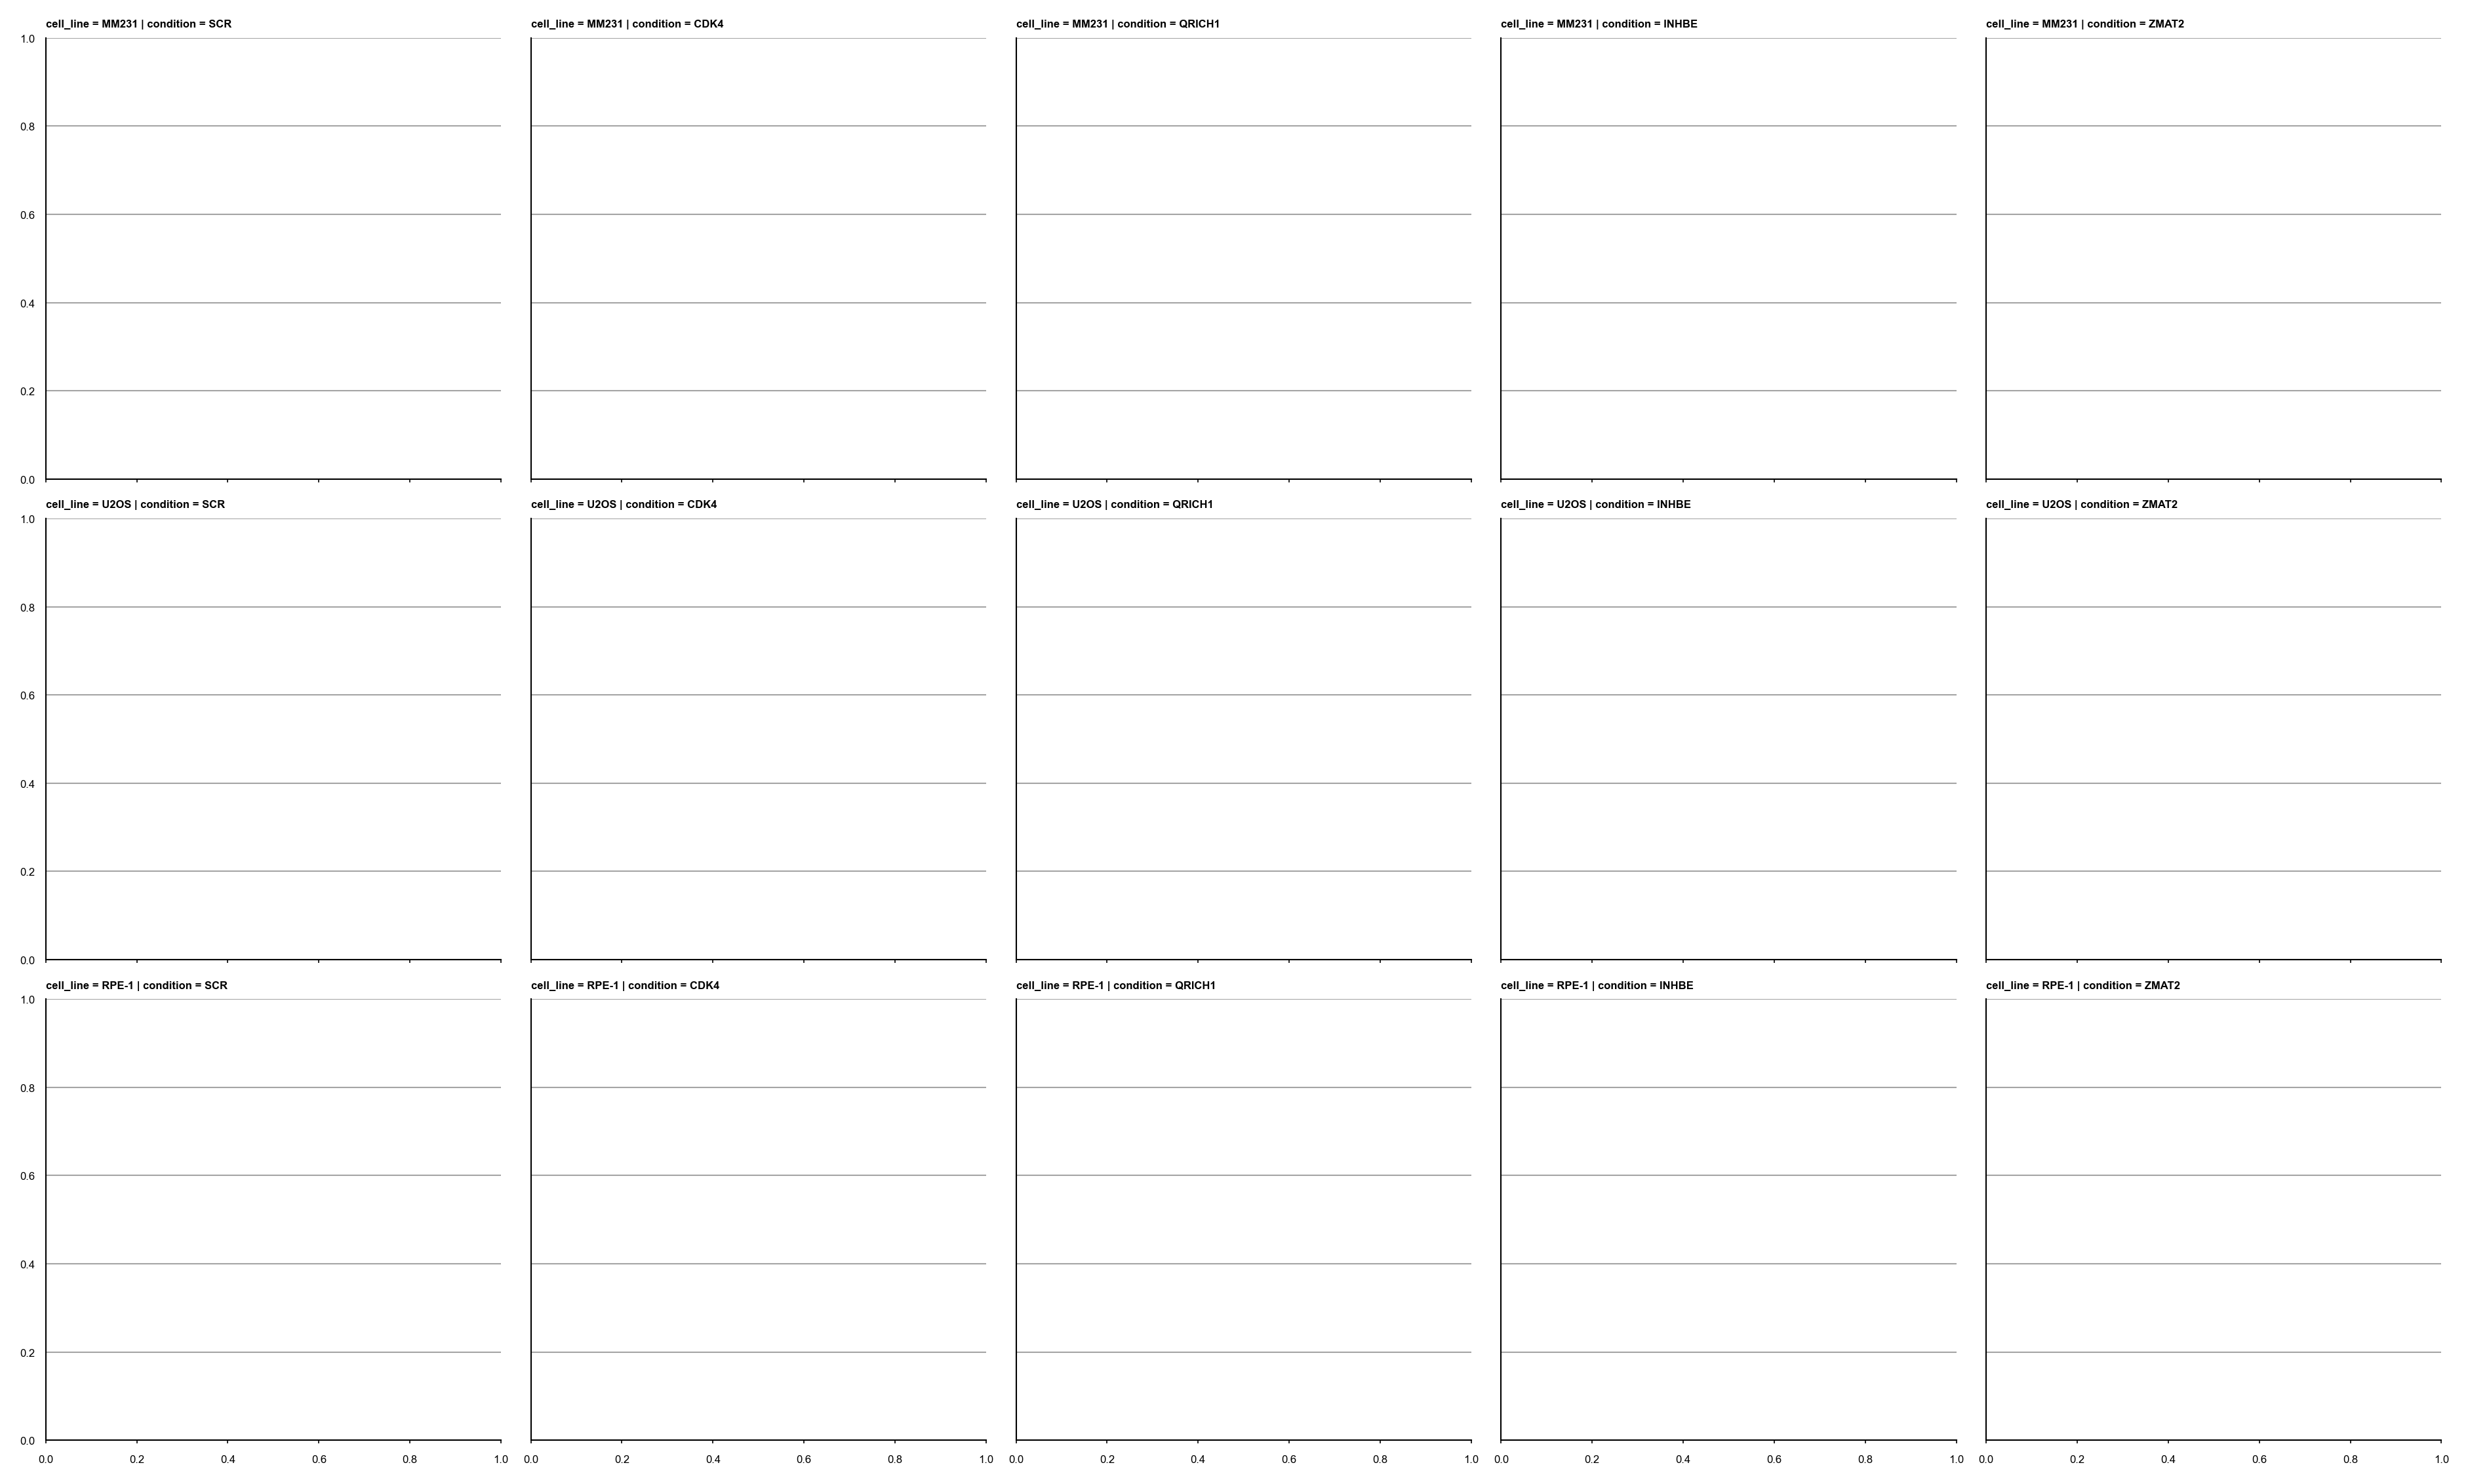

In [8]:
import seaborn as sns
from matplotlib import ticker
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Prepare your data: x_values, y_values

# Calculate density values using KDE



phases = ['G1', 'S', 'G2/M', 'Polyploid', 'Sub-G1']
df1 = df_cc[df_cc.condition.isin(conditions)]
kde = gaussian_kde([df1["integrated_int_DAPI_norm"], df1["intensity_mean_EdU_nucleus_norm"]])
density_values = kde.evaluate([df1["integrated_int_DAPI_norm"], df1["intensity_mean_EdU_nucleus_norm"]])

sns.relplot(data=df1, 
            x="integrated_int_DAPI_norm", 
            y="intensity_mean_EdU_nucleus_norm", 
            hue='cell_cycle', 
            hue_order= phases,
            col='condition', 
            row = 'cell_line',
            kind='scatter',
            size=0.5,
            alpha=0.5,
            c=density_values, 
            cmap='viridis')
plt.xscale("log", base=2)
plt.yscale("log")
plt.xticks([1, 2, 4, 8])
plt.xlim([1, 16])


In [ ]:

def plot_scatter(ax, i, data, col, y_min, y_max, phases, colors, conds):
    ax.scatter(data["integrated_int_DAPI_norm"], data[col], s=1, alpha=0.1)
    ax.set_xlabel("norm. DNA content (log2)")
    if i == len(conds)/2:
        ax.set_ylabel(col)
    else:
        ax.set_ylabel(None)
    ax.set_ylim([y_min, y_max])
    ax.set_yscale("log")
    ax.set_xscale("log", base=2)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.set_xticks([1, 2, 4, 8])
    ax.set_xlim([1, 16])
    scatter_plots = []
    for idx, phase in enumerate(phases):
        phase_df = data.loc[data.cell_cycle == phase]
        scatter = ax.scatter(
            phase_df["integrated_int_DAPI_norm"],
            phase_df[col],
            s=1,
            c=colors[idx],
            alpha=0.1,
            label=phase
        )
        scatter_plots.append(scatter)
    if i == len(conds)/2:
        legend = ax.legend(handles=scatter_plots, loc="upper right")
        for lh in legend.legend_handles:
            lh.set_alpha(0.5)
            lh.set_sizes([10])
        frame = legend.get_frame()
        frame.set_edgecolor('black')